## California Housing Data Analysis

The is the anlysis of the california housing data. 

In [1]:
import pandas as pd
import numpy as np
import os

#variable to store path to data
HOUSING_PATH=""

### Loading and Exploring the data: 

Now we load the housing data and see a few of the functions to see what the data is all about.
* The `describe()` method shows a summary of the numerical attributes.
* `head()` and `tail()` shows the top and the bottom parts of the data.
* The `info()` method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values 

In [2]:
#function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
#Loading and seeing housing data
housing=load_housing_data()

#housing.head()
#housing.tail()
#housing.info()
housing.describe()
#housing["ocean_proximity"].value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We find that there is only one catagorical attribute **ocean_proximity** others are all numerical attributes with 5 different types as found from the `value_counts()` function. From the `describe` function we get an idea that some the variables such as **median_income, median_house_value** and **housing_median_age** are capped at certain values. It also gives us an idea of the units, for exmaple the **median_house_value** or **median_income** are not in $\$$. So next we plot the numerical attributes to get a clearer picture.

### Plotting the values

Another way to get a feel of the numerical attribute of data we are dealing with, is to plot a
histogram for each.


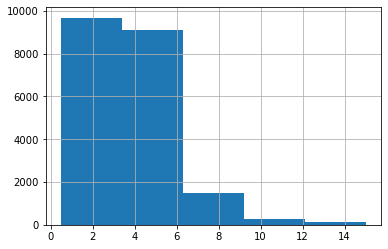

In [3]:
#%matplotlib inline 
#only in a Jupyter notebook
import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))
housing["median_income"].hist(bins=5)
#plt.savefig('data_descriptor.jpg')
plt.show()
plt.close('all')

We can certainly notice the values are neither normalised and are squwed to the right, that is to say the right tail is heavy.

### Seperating the Test and the Training set

Random sampling can be done with the `train_test_split` function from the `sklearn` package. The docs can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Although this might create problems in some areas when the data comes from a stratified polulation.

**stratified sampling:** the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population.

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
#housing["income_cat"].value_counts() / len(housing)
#train_set["income_cat"].value_counts() / len(train_set)
#test_set["income_cat"].value_counts() / len(test_set)

### Creating a strata for the median_income 

Below we will be classifying the **median_income** in to another attribute **income_cat**. Any value more than $5$ is catagorised as a $5$.

In [5]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing["income_cat"].value_counts() / len(housing)
#strat_train_set["income_cat"].value_counts() / len(strat_train_set)
#strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

As it can be seen, test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is quite skewed. Although this is not something necessery in every case but still very important. But now we drop the **income_cat** column so the data returns to its original state.

In [6]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

<Figure size 1440x1440 with 0 Axes>

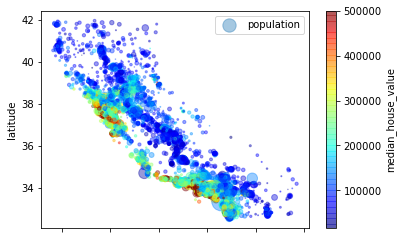

In [7]:
housing = strat_train_set.copy()
fig= plt.figure(figsize=(20,20))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.savefig('housing_geo_plot.jpg',dpi=300)
plt.show()
plt.close('all')

 The radius of each circle represents
the district’s population (`option s`), and the color represents the price (`option c`). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices). This helps to identify where the most expensive neighbourhoods are with respect to location and population density.

### Looking for Correlations


In [8]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Adding relavent attributes.total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [9]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms

First let’s revert to a clean training set (by copying `strat_train_set` once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that `drop()`
creates a copy of the data and does not affect strat_train_set):


In [10]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

**1. Numerical Attributes:** 
The missing values need to be filled in the colummns that have missing values or `NA`. Scikit-Learn provides a handy class to take care of missing values: ``Imputer``.First an Imputer instance is create, specifying that each attribute’s missing values needs to be replaced with the median of that attribute:

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#since the imputer can work only on numerical atributes the catagorical variables needs to be seperated
housing_num = housing.drop("ocean_proximity", axis=1)
#fiting or computing the median values of each of the attributes
imputer.fit(housing_num)

#checking if its actually the median
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [12]:
#replacing the median values in place of NA
X = imputer.transform(housing_num)
#converting back in to a data frame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

**2. Text and Categorical Attributes:**

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. To fix this
issue, a common solution is to create one binary attribute per category.  This is
called one-hot encoding, because only one attribute will be equal to 1 (hot), while the
others will be 0 (cold).


#### One hot encoder

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

## Custom Transformers

create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid *args and \**kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for auto‐
matic hyperparameter tuning

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

Feature scaling is important because most ML algorithms don’t perform well when
the input numerical attributes have very different scales. So we can perform either *MinMax* scaling or *Standardisation*. MinMax puts the values between 0 to 1 and Standardisation is Normalisation, substract the mean and divide by variance. So its always zero mean but can be negative.  

## Pipelines

Many transformations need to be performed in the right order to clean the data. Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.

### catagorical attributes


In [18]:
from sklearn.pipeline import FeatureUnion
from sklearn_features.transformers import DataFrameSelector


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('one_hot_encoder', OneHotEncoder(sparse=False))
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

Handling Numpy arrays

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Select and Train a Model

#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

#### Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Since the root mean square error is zero, this might be a truly great model or a case of overfiting. We use cross validation to investigate further.

## Better Evaluation Using Cross-Validation


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [70351.6840976  68846.6952126  70304.20678723 68675.21304323
 71906.25035686 75874.5879269  71682.12659264 71284.9913562
 76819.00245632 69351.71027299]
Mean: 71509.64681025584
Standard deviation: 2646.799226097037


Random forests

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
display_scores(forest_rmse_scores)

Scores: [49151.9785165  47545.38064404 50434.14048289 52481.48446531
 49251.12530262 52949.30956524 48634.44470214 48037.57603091
 52885.94588454 50288.6721561 ]
Mean: 50166.00577502886
Standard deviation: 1902.6840291644078


In [24]:
forest_rmse

18751.776382080672

## Saving model parameters and data

In [27]:
#using general pickle
import pickle
pkl_filename = "forest_model.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(forest_reg, file)
    
from joblib import dump, load
dump(forest_reg, 'forest_reg.joblib') 

#using joblib
from joblib import dump, load
dump(forest_reg, 'forest_reg.joblib') 
#loding the model back

forest_reg = load('forest_reg.joblib') 

## Fine-Tuning the Model

Once we have found the best performing model we can fidel with the highper parameters to find a combination that works  best. Doing this manually cna be cumbersome so `Scikitlearn` provides two objects `GridSearchCV` and `RandomizedSearchCV` for finding out the best combination of hyperparameters. Randomized search is particualrly important when the hyperparameter space is quite large for gridsearch.

#### Grid search

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [37]:
print(grid_search.best_params_) 
grid_search.best_estimator_

{'max_features': 6, 'n_estimators': 30}


RandomForestRegressor(max_features=6, n_estimators=30)

In [35]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64415.540688221765 {'max_features': 2, 'n_estimators': 3}
56207.245092596 {'max_features': 2, 'n_estimators': 10}
52960.258107036585 {'max_features': 2, 'n_estimators': 30}
60623.696211787406 {'max_features': 4, 'n_estimators': 3}
53213.20200471056 {'max_features': 4, 'n_estimators': 10}
50535.20691923193 {'max_features': 4, 'n_estimators': 30}
58740.693511991216 {'max_features': 6, 'n_estimators': 3}
52354.332524887126 {'max_features': 6, 'n_estimators': 10}
50015.09364703918 {'max_features': 6, 'n_estimators': 30}
58240.67157072816 {'max_features': 8, 'n_estimators': 3}
52339.27173424416 {'max_features': 8, 'n_estimators': 10}
50085.406513609814 {'max_features': 8, 'n_estimators': 30}
62569.83563678987 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54109.316666000006 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58917.21993990588 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52958.52426036063 {'bootstrap': False, 'max_features': 3, 'n_estimators

#### Ensemble Methods

Even the best models on a data set has some types of erros. A way of minimizing the errors is to average few of the top models and if they make very different type of errors then it will cancel out in the process of averaging.

##### Analysing where the models makes errors

In [41]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs 
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3054219342083921, 'median_income'),
 (0.17603040845945686, 'INLAND'),
 (0.10817822827275593, 'pop_per_hhold'),
 (0.08103824316883637, 'bedrooms_per_room'),
 (0.07695679861118115, 'longitude'),
 (0.06532363832329936, 'latitude'),
 (0.054630522488772336, 'rooms_per_hhold'),
 (0.041935100727150315, 'housing_median_age'),
 (0.018755942664979024, 'population'),
 (0.018048255241952135, 'total_rooms'),
 (0.016561093131709472, 'total_bedrooms'),
 (0.016150159513452115, 'households'),
 (0.01249301404146012, '<1H OCEAN'),
 (0.004240493610523709, 'NEAR OCEAN'),
 (0.004148840474481162, 'NEAR BAY'),
 (8.732706159780808e-05, 'ISLAND')]

So we can see that the most important attribute fpr predicting house price is `median_income`. We can also see that one one `ocean_proximity` variable is quite important others are orders of magnitude smaller.

## Evaluate Your System on the Test Set


In [43]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47948.74645250487